## Submitted By:
### Kiran Gupta

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

##### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 

##### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import All the useful Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding the data

In [6]:
# Load Car Price File
car = pd.read_csv("CarPrice_Assignment.csv")

In [7]:
car.shape

(205, 26)

In [8]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
# Define the Categorical and Numerical Variables
cat_vars = ['symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem']
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',
            'boreratio','stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
            'price']
cat_var = cat_vars
num_var = num_vars

In [13]:
car[cat_vars].head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Visualising the data and select Significant variables

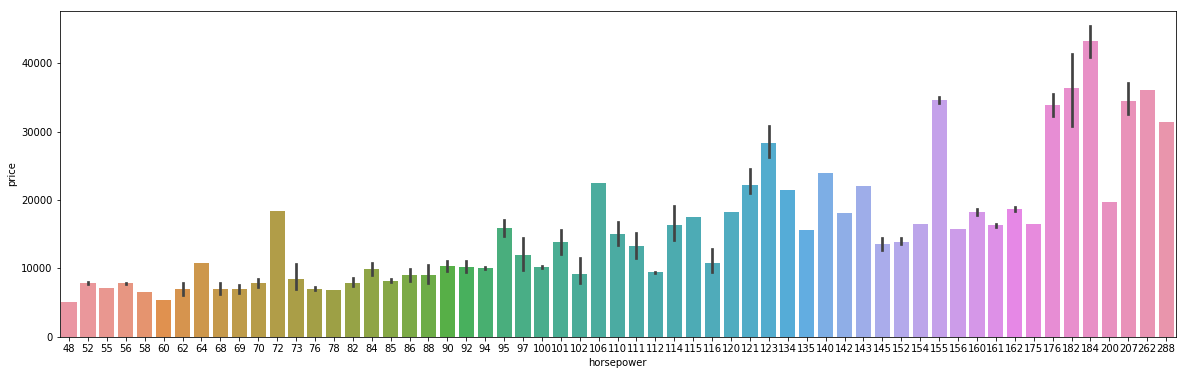

In [14]:
# Draw the plot between horsepower and price

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='horsepower', y='price', data = car)
plt.show()

###### Price is increasing as HorsePower Increases

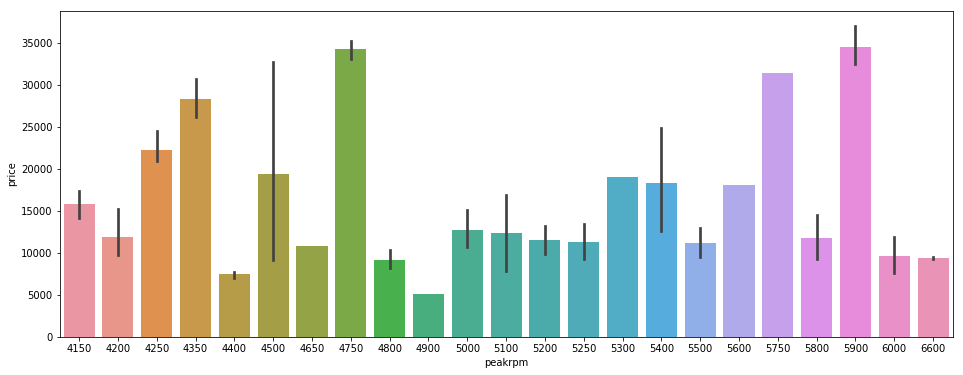

In [15]:
# Draw the plot between horsepower and price

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='peakrpm', y='price', data = car)
plt.show()

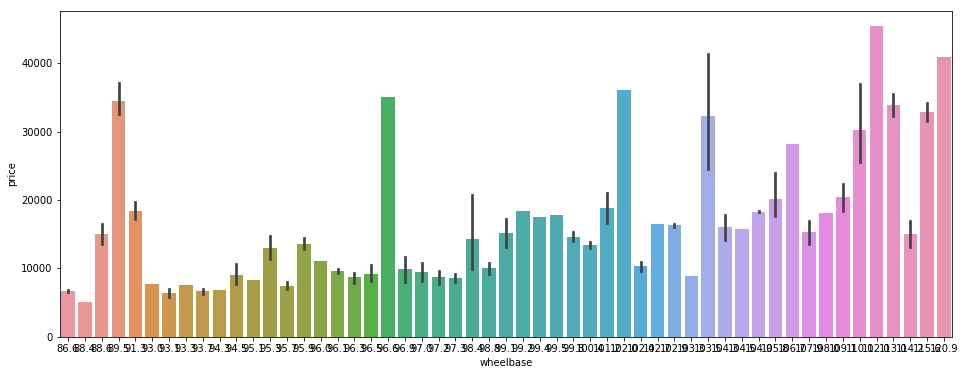

In [16]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='wheelbase', y='price', data = car)
plt.show()

##### As the wheel base rise upwards, the price is also very high.
Most of the wheel base have price 10-20k.

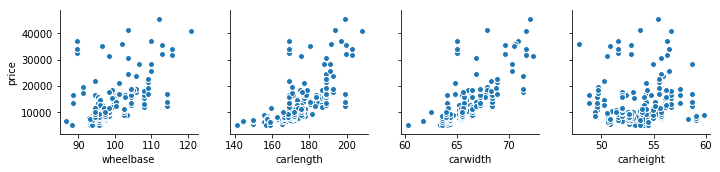

In [17]:
sns.pairplot(car, x_vars=num_vars[0:4], y_vars='price')
plt.show()

#### Inference:
1. From the above graph, wheelbase, carlength and carwidth showing positive correlation with price.
2. Carheight is not showing any relation with price.

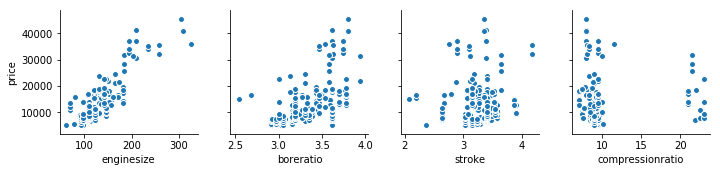

In [18]:
sns.pairplot(car, x_vars=num_vars[5:9], y_vars='price')
plt.show()

#### Inference:
1. From the above graph, enginesize, boreratio and stroke showing positive correlation with price.
2. Compressionratio is not showing any relation with price.

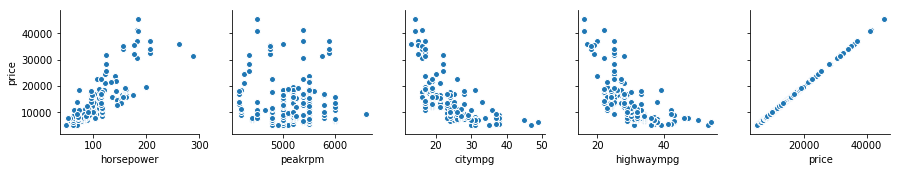

In [19]:
sns.pairplot(car, x_vars=num_vars[9:], y_vars='price')
plt.show()

#### Inference:
1. From the above graph, horsepower showing positive correlation with price.
2. Citympg, highwaympg is showing negative corelation with price.

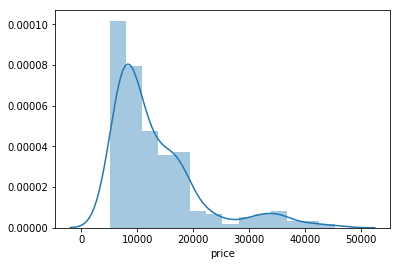

In [20]:
#Distribution plot for price 

sns.distplot(car['price'])
plt.show()

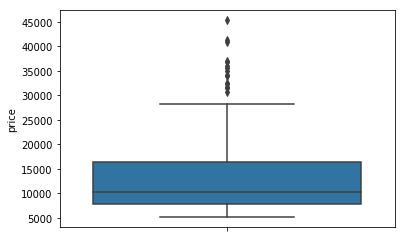

In [21]:
#Box plot for price
sns.boxplot(y = car['price'])
plt.show()

In [22]:
#Get the unique for each categorical Column

print("symboling:", car[cat_vars[0]].unique())
print("fueltype:", car[cat_vars[1]].unique())
print("aspiration:", car[cat_vars[2]].unique())
print('doornumber:', car[cat_vars[3]].unique())
print("carbody:", car[cat_vars[4]].unique())
print("drivewheel:", car[cat_vars[5]].unique())
print("enginelocation:", car[cat_vars[6]].unique())
print("enginetype:", car[cat_vars[7]].unique())
print("cylindernumber:", car[cat_vars[8]].unique())
print("fuelsystem:", car[cat_vars[9]].unique())

symboling: [ 3  1  2  0 -1 -2]
fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


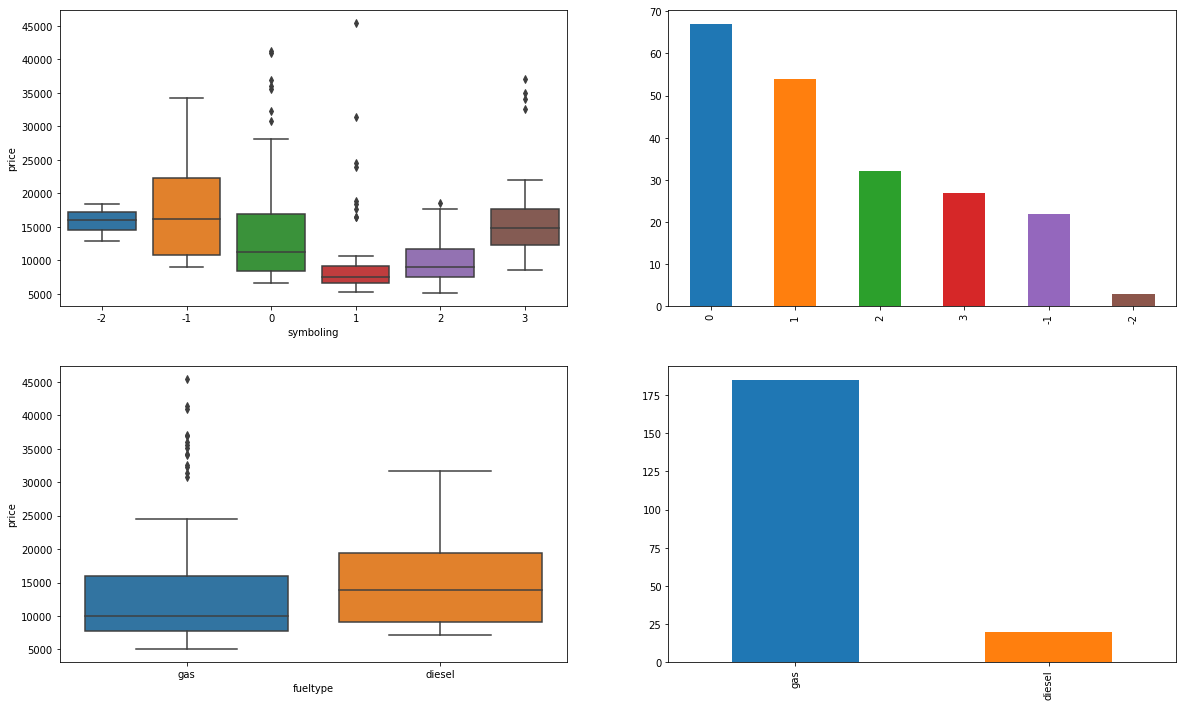

In [23]:
#Bar and box Plot of Symboling, Fueltype with Price

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(2,2,2)
car.symboling.value_counts().plot('bar')
plt.subplot(2,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(2,2,4)
car.fueltype.value_counts().plot('bar')
plt.show()

## Inference:
Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical).
Most of the risk factor is 0 and 1. 0 is fair risk factor. 1 is very risky and number of counts is very less so it does not have much significant.
Fuel Type: Fuel type have significant impact on price.


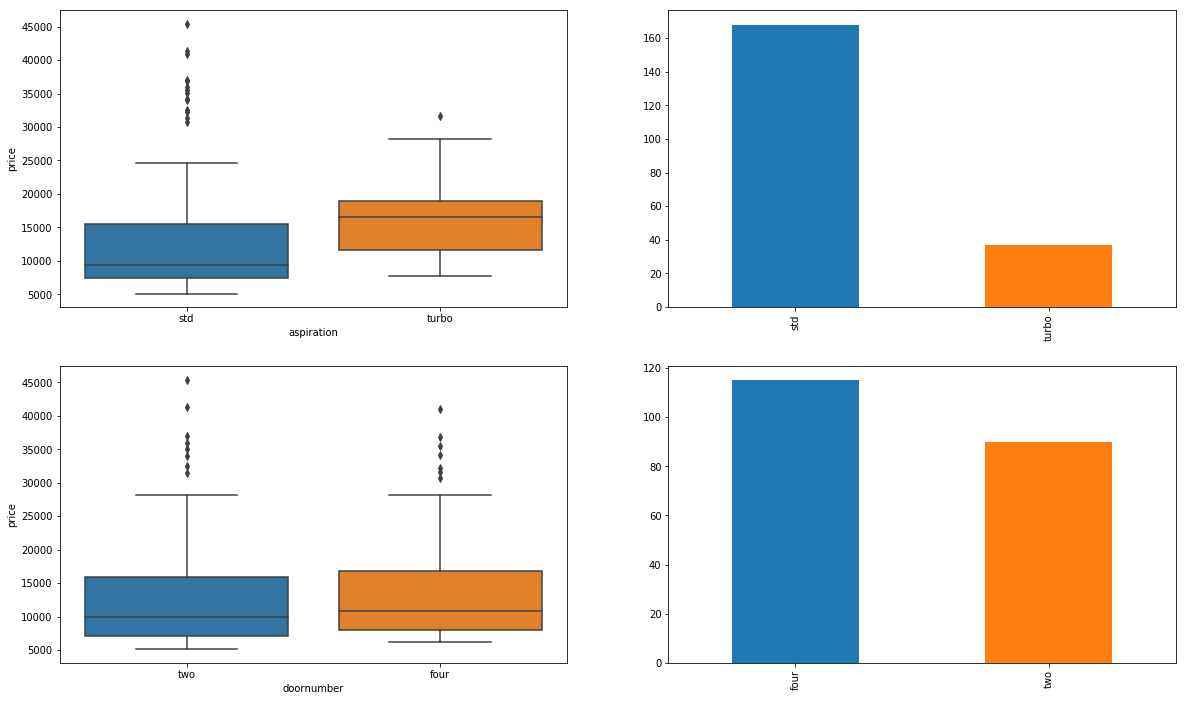

In [24]:
#Bar and box Plot of Asymboling, Doornumber with Price

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,2,2)
car.aspiration.value_counts().plot('bar')
plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,2,4)
car.doornumber.value_counts().plot('bar')
plt.show()

Turbo type vehicle have higher price as compared to std.
Two and four number door have not much significant, both have same mean, median.

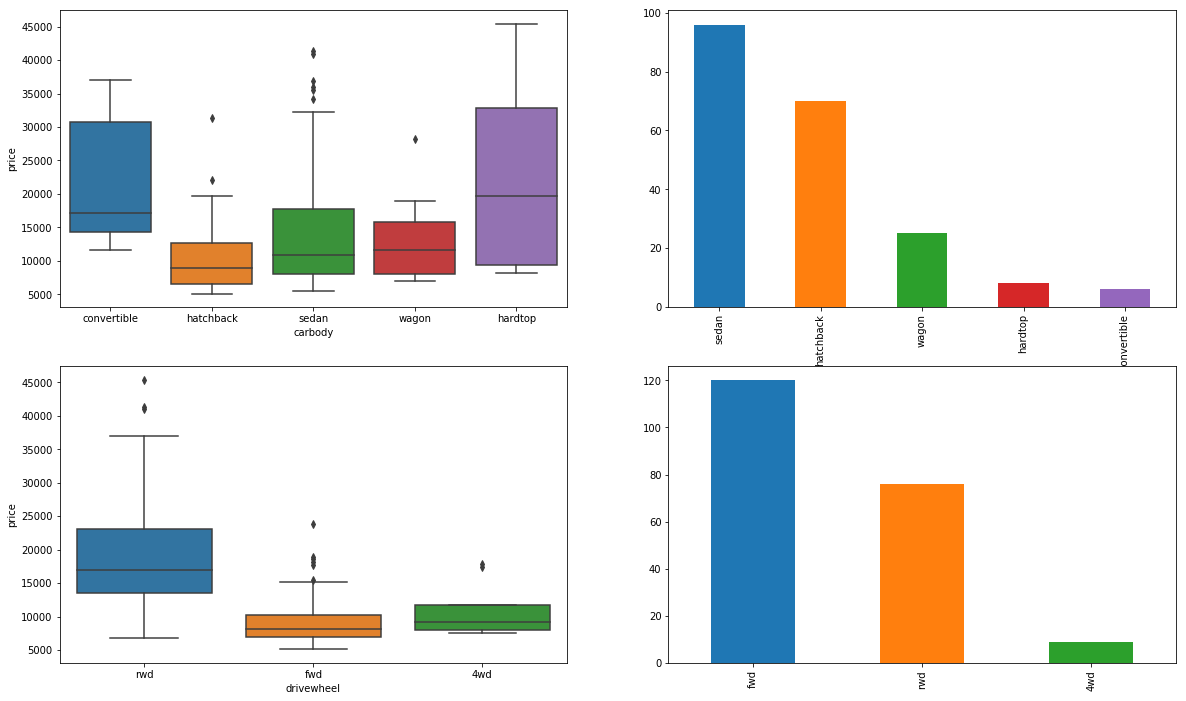

In [25]:
#Bar and box Plot of Carbody, drivewheel with Price

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,2,2)
car.carbody.value_counts().plot('bar')
plt.subplot(2,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,2,4)
car.drivewheel.value_counts().plot('bar')
plt.show()

Most of the people uses Sedan and hatchback.
fwd wheel have more number of user as compared to rwd and 4wd.

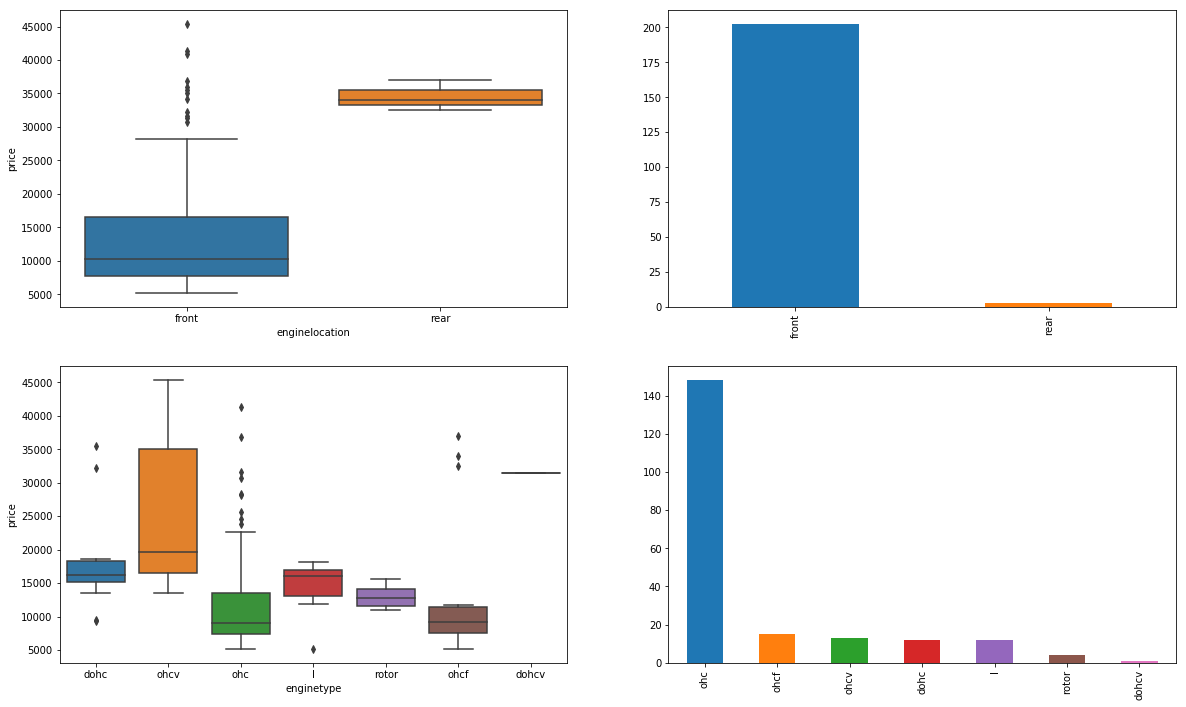

In [26]:
#Bar and box Plot of enginelocation, enginetype with Price

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(2,2,2)
car.enginelocation.value_counts().plot('bar')
plt.subplot(2,2,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,2,4)
car.enginetype.value_counts().plot('bar')
plt.show()

##### Reartype enginelocation have comparitavely higher price as compared to front engine.
##### Most of the people uses ohc engine type.

##### Enginelocation:
It does not have much significant as most of Enginelocation front, rear engine have very high price.
##### EngineType: 
It have significant infernce over price.

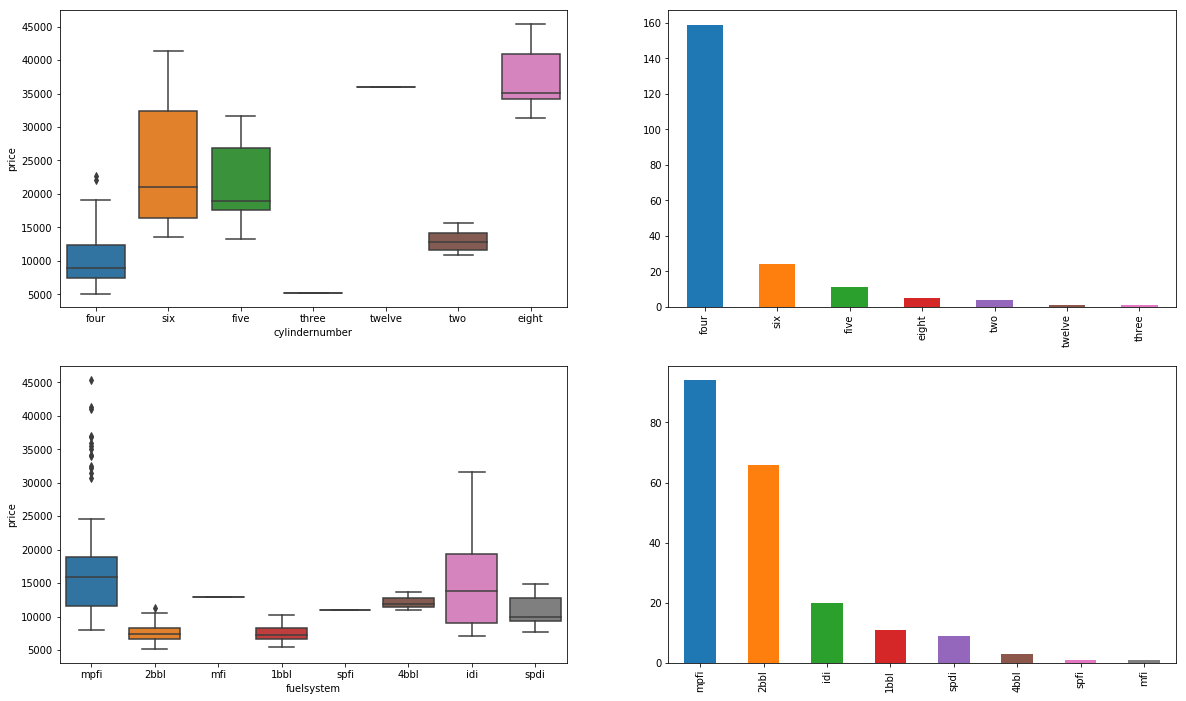

In [27]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,2,2)
car.cylindernumber.value_counts().plot('bar')
plt.subplot(2,2,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.subplot(2,2,4)
car.fuelsystem.value_counts().plot('bar')
plt.show()

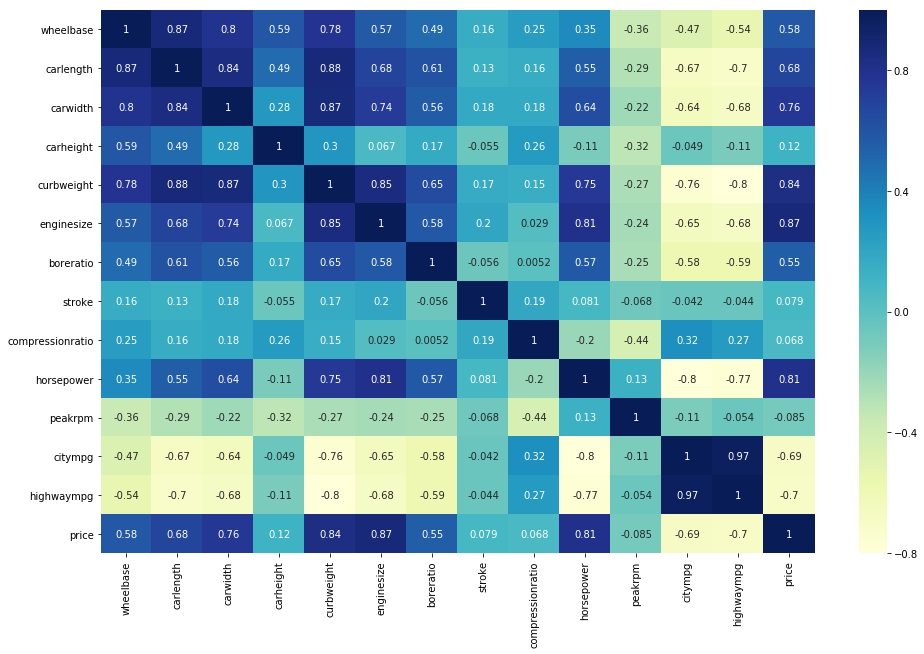

In [28]:
# Draw the correlation for Num Variables
plt.figure(figsize = (16, 10))
sns.heatmap(car[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Convert Catgorical Variable into numerical values

In [29]:
# Convert categorical variables using label Encoding
le = LabelEncoder()

In [30]:
# Tranform the Categorical Variables which have two levels
car[cat_vars[1]] = le.fit_transform(car[cat_vars[1]])
car[cat_vars[2]] = le.fit_transform(car[cat_vars[2]])
car[cat_vars[3]] = le.fit_transform(car[cat_vars[3]])
car[cat_vars[6]] = le.fit_transform(car[cat_vars[6]])

In [31]:
car[cat_vars].head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,1,0,1,convertible,rwd,0,dohc,four,mpfi
1,3,1,0,1,convertible,rwd,0,dohc,four,mpfi
2,1,1,0,1,hatchback,rwd,0,ohcv,six,mpfi
3,2,1,0,0,sedan,fwd,0,ohc,four,mpfi
4,2,1,0,0,sedan,4wd,0,ohc,five,mpfi


In [32]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,sedan,fwd,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,sedan,4wd,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
# Get the Car-company column for car name
car['car_company'] = car['CarName'].str.split(' ', 1, expand=True)[0]

In [34]:
# Get the unique name of car company
car['car_company'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [35]:
#Replace the duplicates

car['car_company'].replace('maxda','mazda',inplace=True)
car['car_company'].replace('Nissan','nissan',inplace=True)
car['car_company'].replace('porcshce','porsche',inplace=True)
car['car_company'].replace('toyouta','toyota',inplace=True)
car['car_company'].replace(['volkswagen', 'vw'],'vokswagen',inplace=True)

In [36]:
car['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volvo'], dtype=object)

In [37]:
# Convert the car company name into dummy variables
company = pd.get_dummies(car['car_company'])

In [38]:
company.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
company.shape

(205, 22)

In [40]:
company.columns

Index(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'vokswagen', 'volvo'],
      dtype='object')

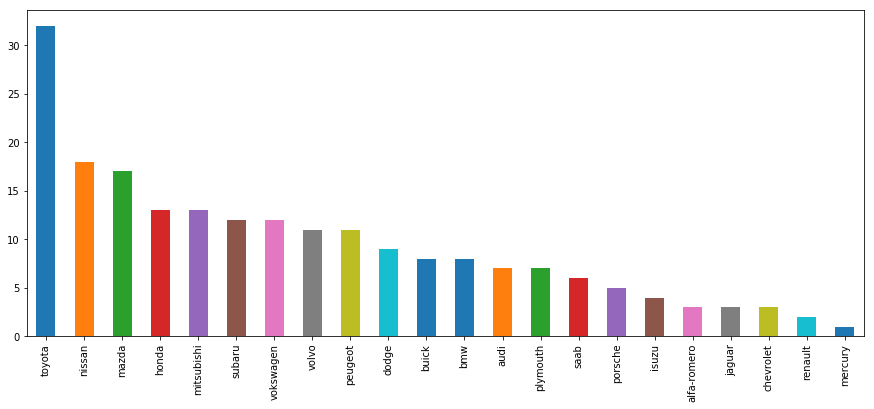

In [41]:
# Draw the graph to show the num of count of each company 
plt.figure(figsize=(15, 6))
car.car_company.value_counts().plot('bar')
plt.show()

###### Toyoto have Highest num of cars.
###### Nissan and Mazda are 2nd and 3rd highest number of car.

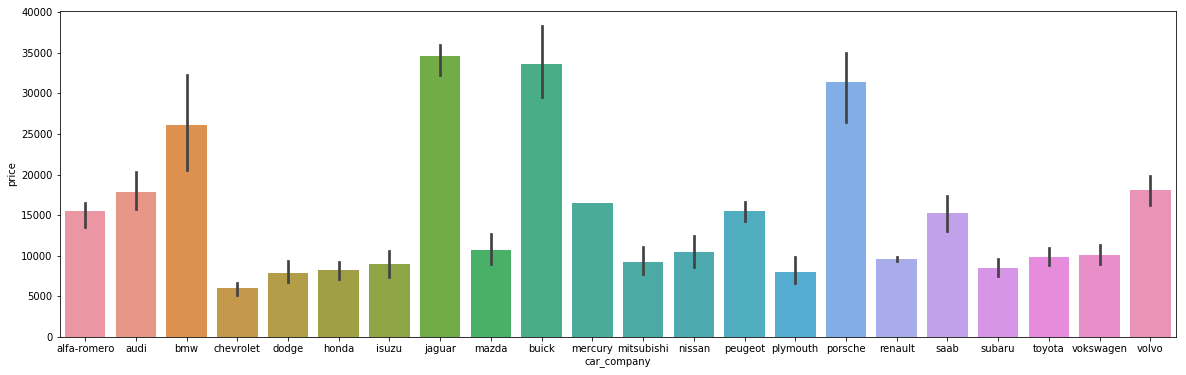

In [42]:
plt.figure(figsize=(20, 6))
sns.barplot(x='car_company', y='price', data = car)
plt.show()

###### Jaguar are very costly car having price around 35K
###### Buick are second costly car  in the row.
###### Companies like Chevrolet, dodge have cheapest price.

## Derive the new column using car company and price to get the car range

In [43]:
car['price'] = car['price'].astype('int')
temp = car
table = temp.groupby(['car_company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='car_company')
bins = [0,10000,20000,40000]
car_bin=['Budget','Medium','Luxury']
car['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carsrange
0,1,3,alfa-romero giulia,1,0,1,convertible,rwd,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium
1,2,3,alfa-romero stelvio,1,0,1,convertible,rwd,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium
2,3,1,alfa-romero Quadrifoglio,1,0,1,hatchback,rwd,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium
3,4,2,audi 100 ls,1,0,0,sedan,fwd,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,Medium
4,5,2,audi 100ls,1,0,0,sedan,4wd,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,Medium


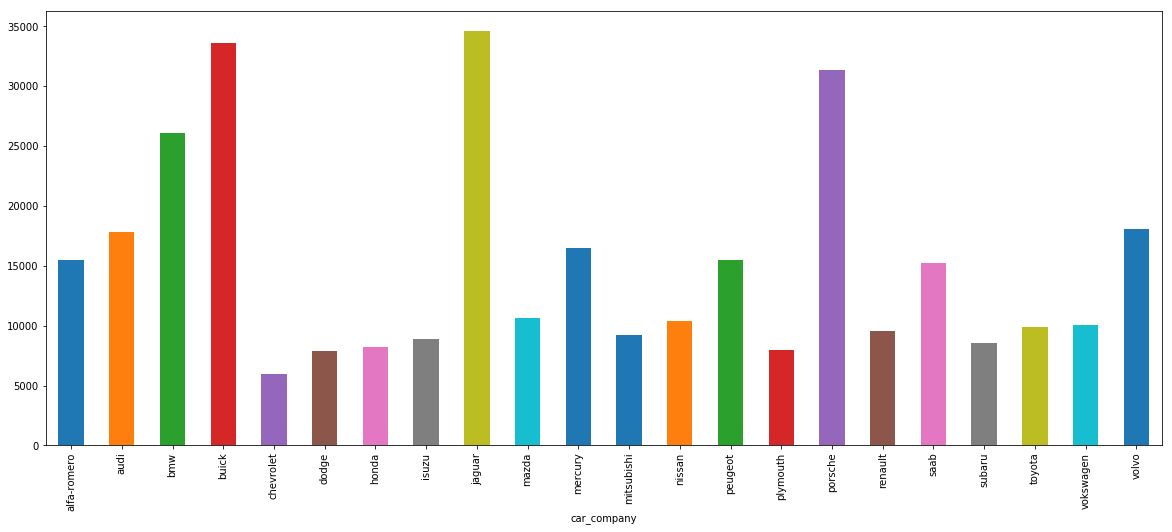

In [44]:
plt.figure(figsize=(20, 8))
car.groupby(['car_company'])['price'].mean().plot.bar()

In [45]:
## Copy the dataset in Master fle and use it for processing
master = car

In [46]:
master.shape

(205, 28)

In [47]:
#drop numerical variable which does not affect much

drop_col = ['peakrpm','compressionratio','stroke','citympg','highwaympg','car_ID','CarName','car_company','carheight']
master = master.drop(drop_col, axis=1)

In [48]:
master.shape

(205, 19)

In [49]:
#drop some of categorical Variables 

master = master.drop(['symboling','doornumber','enginelocation'], axis =1)

In [50]:
master.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,carsrange
0,1,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495,Medium
1,1,0,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500,Medium
2,1,0,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500,Medium
3,1,0,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950,Medium
4,1,0,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450,Medium


# Create Dummy Variables for Categorical Column

In [51]:
cartype = pd.get_dummies(master['carbody'], drop_first = True)
wheel = pd.get_dummies(master['drivewheel'], drop_first = True)
etype = pd.get_dummies(master['enginetype'], drop_first = True)
cynnum = pd.get_dummies(master['cylindernumber'], drop_first = True)
fuelsys = pd.get_dummies(master['fuelsystem'], drop_first = True)
carrange = pd.get_dummies(master['carsrange'], drop_first = True)

In [52]:
# Add the results to the original master dataframe

master = pd.concat([master, cartype], axis = 1)
master = pd.concat([master, wheel], axis = 1)
master = pd.concat([master, etype], axis = 1)
master = pd.concat([master, cynnum], axis = 1)
master = pd.concat([master, fuelsys], axis = 1)
master = pd.concat([master, carrange], axis = 1)

In [53]:
#Drop main column from Master File

master = master.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','carsrange'],axis=1)

In [54]:
master.shape

(205, 37)

## Modeling of Data

In [55]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
df_train.shape

(143, 37)

In [57]:
scaler = MinMaxScaler()

In [58]:
df_train.columns

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'Medium', 'Luxury'],
      dtype='object')

In [59]:
num_vars = ['wheelbase','carwidth', 'carlength','curbweight','enginesize','boreratio','horsepower','price']

df_train[num_vars].describe()

,wheelbase,carwidth,carlength,curbweight,enginesize,boreratio,horsepower,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.523077,65.839860,173.416783,2539.510490,124.958042,3.307413,102.552448,13056.335664
std,5.961835,2.214203,12.598122,544.650539,40.974034,0.260997,39.722750,7807.031621
min,86.600000,60.300000,141.100000,1488.000000,61.000000,2.680000,48.000000,5118.000000
25%,94.500000,63.950000,165.650000,2121.000000,97.000000,3.065000,70.000000,7554.000000
50%,96.500000,65.400000,172.000000,2405.000000,110.000000,3.310000,94.000000,10198.000000
75%,101.200000,66.900000,182.300000,2930.500000,141.000000,3.540000,116.000000,16465.000000
max,115.600000,72.300000,202.600000,4066.000000,326.000000,3.940000,288.000000,41315.000000


In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [61]:
df_train.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Luxury
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.181818,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219309,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.412587,0.118881
std,0.288490,0.387050,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.000000,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,0.000000,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


In [62]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [63]:
X_train.shape

(143, 36)

## Create Model with all the Independent variables

In [64]:
lm = LinearRegression()
lm.fit(X_train,y_train)
selector = RFE(lm, 15)
selector = selector.fit(X_train,y_train)

In [65]:
list(zip(X_train.columns, selector.support_,selector.ranking_))

[('fueltype', False, 12),
 ('aspiration', False, 18),
 ('wheelbase', True, 1),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 6),
 ('horsepower', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 11),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', False, 7),
 ('rotor', False, 16),
 ('five', False, 2),
 ('four', True, 1),
 ('six', False, 3),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 17),
 ('2bbl', False, 19),
 ('4bbl', False, 13),
 ('idi', True, 1),
 ('mfi', False, 21),
 ('mpfi', False, 14),
 ('spdi', True, 1),
 ('spfi', False, 22),
 ('Medium', False, 10),
 ('Luxury', True, 1)]

In [66]:
X_train_rfe = X_train[X_train.columns[selector.support_]]

In [67]:
#Build a linear model
import statsmodels.api as sm
X = X_train_rfe
X = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.69e-68
Time:                        20:03:18   Log-Likelihood:                 214.50
No. Observations:                 143   AIC:                            -397.0
Df Residuals:                     127   BIC:                            -349.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0481      0.044      1.094      0.276      -0.039       0.135
wheelbase      0.0666      0.061      1.087      0.279      -0.055       0.188
carwidth       0.2147      0.067      3.203      0.002       0.082       0.347
curbweight     0.1076      0.088      1.217      0.226      -0.067       0.283
horsepower     0.4882      0.089      5.508      0.000       0.313       0.664
hardtop       -0.0658      0.047     -1.394      0.166      -0.159       0.028
hatchback     -0.1315      0.034     -3.824      0.000      -0.200      -0.063
sedan         -0.1102      0.035     -3.152      0.002      -0.179      -0.041
wagon         -0.1317      0.036     -3.685      0.000      -0.202      -0.061
dohcv         -0.2483      0.076     -3.249      0.001      -0.400      -0.097
four          -0.0333      0.018     -1.893      0.061      -0.068       0.002
three          0.0802      0.063      1.263      0.209      -0.045       0.206
twelve        -0.0919      0.066     -1.394      0.166      -0.223       0.039
idi            0.0517      0.022      2.359      0.020       0.008       0.095
spdi          -0.0389      0.026     -1.473      0.143      -0.091       0.013
Luxury         0.2495      0.020     12.688      0.000       0.211       0.288
==============================================================================
Omnibus:                       48.889   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.456
Skew:                           1.156   Prob(JB):                     1.47e-45
Kurtosis:                       8.413   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.20
3,curbweight,15.09
7,sedan,13.27
6,hatchback,11.60
4,horsepower,9.31
1,wheelbase,6.86
2,carwidth,6.62
8,wagon,6.41
10,four,2.59
5,hardtop,2.00


In [69]:
# Dropping wheelbase as p-value is high
X = X.drop(['wheelbase'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.56e-69
Time:                        20:03:18   Log-Likelihood:                 213.84
No. Observations:                 143   AIC:                            -397.7
Df Residuals:                     128   BIC:                            -353.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0298      0.041      0.734      0.4

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.92
2,curbweight,10.26
6,sedan,9.95
5,hatchback,9.47
3,horsepower,7.70
1,carwidth,5.36
7,wagon,5.18
9,four,2.57
4,hardtop,1.80
8,dohcv,1.77


In [71]:
# Dropping hardtop as p-value is high and creating 3rd linear reg model
X = X.drop(['hardtop'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.85e-70
Time:                        20:03:19   Log-Likelihood:                 213.16
No. Observations:                 143   AIC:                            -398.3
Df Residuals:                     129   BIC:                            -356.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.036      0.235      0.8

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.78
2,curbweight,9.94
3,horsepower,7.42
5,sedan,6.28
4,hatchback,5.95
1,carwidth,5.36
6,wagon,3.70
8,four,2.57
13,Luxury,1.76
7,dohcv,1.74


In [73]:
# Dropping 'three' and creating 4th linear reg model
X = X.drop(['three'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.64e-71
Time:                        20:03:19   Log-Likelihood:                 212.12
No. Observations:                 143   AIC:                            -398.2
Df Residuals:                     130   BIC:                            -359.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0235      0.034      0.687      0.4

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.53
2,curbweight,9.92
3,horsepower,7.25
5,sedan,6.28
4,hatchback,5.94
1,carwidth,5.19
6,wagon,3.70
8,four,2.28
12,Luxury,1.76
7,dohcv,1.72


In [75]:
# Dropping 'tweleve' and creating 5th linear reg model
X = X.drop(['twelve'], 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.40e-71
Time:                        20:03:19   Log-Likelihood:                 211.13
No. Observations:                 143   AIC:                            -398.3
Df Residuals:                     131   BIC:                            -362.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.033      1.004      0.3

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.09
2,curbweight,9.70
3,horsepower,6.19
5,sedan,6.16
4,hatchback,5.88
1,carwidth,5.19
6,wagon,3.64
8,four,2.19
11,Luxury,1.73
9,idi,1.65


In [77]:
# Dropping 'spdi' and creating 6th linear reg model
X = X_train_lm.drop(['spdi'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.16e-72
Time:                        20:47:25   Log-Likelihood:                 210.29
No. Observations:                 143   AIC:                            -398.6
Df Residuals:                     132   BIC:                            -366.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.033      1.256      0.2

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.41
2,curbweight,9.70
5,sedan,6.12
3,horsepower,5.79
4,hatchback,5.72
1,carwidth,5.15
6,wagon,3.63
8,four,2.04
10,Luxury,1.73
9,idi,1.64


In [80]:
# Dropping 'idi' and creating 7th linear reg model
X = X_train_lm.drop(['idi'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.26e-73
Time:                        20:47:52   Log-Likelihood:                 208.42
No. Observations:                 143   AIC:                            -396.8
Df Residuals:                     133   BIC:                            -367.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0387      0.033      1.164      0.2

In [81]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.32
2,curbweight,8.12
5,sedan,6.12
4,hatchback,5.72
1,carwidth,5.14
3,horsepower,4.10
6,wagon,3.58
8,four,2.04
9,Luxury,1.73
7,dohcv,1.50


In [82]:
# Dropping 'curbweight' and creating 8th linear reg model
X = X_train_lm.drop(['curbweight'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.86e-71
Time:                        20:47:56   Log-Likelihood:                 201.12
No. Observations:                 143   AIC:                            -384.2
Df Residuals:                     134   BIC:                            -357.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0409      0.035      1.174      0.2

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.31
4,sedan,6.10
3,hatchback,5.62
5,wagon,3.48
2,horsepower,3.07
1,carwidth,2.25
7,four,2.03
8,Luxury,1.66
6,dohcv,1.26


In [84]:
# Dropping 'sedan' and creating 9th linear reg model
X = X_train_lm.drop(['sedan'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.14e-70
Time:                        20:48:16   Log-Likelihood:                 195.67
No. Observations:                 143   AIC:                            -375.3
Df Residuals:                     135   BIC:                            -351.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.028     -1.153      0.2

In [85]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.24
2,horsepower,2.91
1,carwidth,2.13
6,four,2.02
7,Luxury,1.65
5,dohcv,1.26
3,hatchback,1.24
4,wagon,1.11


In [86]:
# Dropping 'wagon' and creating 10th linear reg model
X = X_train_lm.drop(['wagon'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.76e-71
Time:                        20:48:21   Log-Likelihood:                 195.22
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     136   BIC:                            -355.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0344      0.028     -1.249      0.2

In [87]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.99
2,horsepower,2.91
1,carwidth,2.12
5,four,2.02
6,Luxury,1.63
4,dohcv,1.26
3,hatchback,1.14


In [88]:
# Dropping 'four' and creating 11th linear reg model
X = X_train_lm.drop(['four'], 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        20:48:48   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [89]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,Luxury,1.53
4,dohcv,1.21
3,hatchback,1.13


## R-square is 0.912 which is good enough for the model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_price = lr_11.predict(X_train_lm)

Text(0.5,0,'Errors')

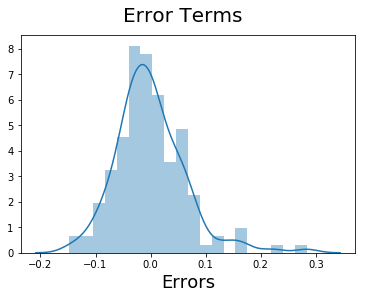

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to correct.

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [93]:
num_vars = ['wheelbase','carwidth', 'carlength','curbweight','enginesize','boreratio','horsepower','price']

In [94]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [96]:
df_test.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Luxury
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.177419,0.370121,0.486741,0.375212,0.371743,0.228835,0.667691,0.359521,0.209644,...,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.435484,0.112903
std,0.319058,0.385142,0.179970,0.183964,0.208977,0.222354,0.188416,0.228484,0.252970,0.210911,...,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.499868,0.319058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.265306,0.389764,0.221053,0.219125,0.126638,0.515873,0.140323,0.076536,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.327988,0.475591,0.326316,0.344065,0.183406,0.674603,0.312903,0.136847,...,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.482507,0.642126,0.421053,0.540726,0.287118,0.857143,0.432258,0.280049,...,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [97]:
y_test = df_test.pop('price')
X_test = df_test

In [98]:
# Now let's use our model to make predictions.
X_train_lm = X_train_lm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

In [99]:
# Making predictions using the fourth model

y_pred = lr_11.predict(X_test_lm)

In [100]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8146387226353737

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

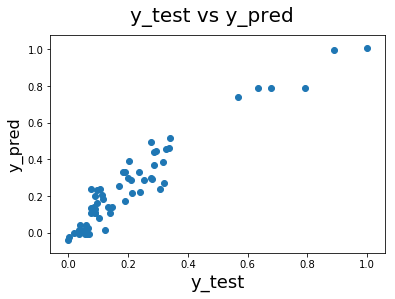

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [102]:
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        20:57:08   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.000      -0.132      -0.062
carwidth       0.3952      0.043      9.252      0.000       0.311       0.480
horsepower     0.5013      0.051      9.832      0.000       0.401       0.602
hatchback     -0.0336      0.012     -2.764      0.006      -0.058      -0.010
dohcv         -0.3231      0.072     -4.502      0.000      -0.465      -0.181
Luxury         0.2833      0.021     13.615      0.000       0.242       0.324
==============================================================================
Omnibus:                       36.097   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.717
Skew:                           1.067   Prob(JB):                     8.07e-18
Kurtosis:                       5.943   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The final model meets all the assumptions including no mutlicollinearity and has an R-Square of 86% which is satisfactory given small dataset/less data for training the model.

###### Inference :¶
###### R-sqaured and Adjusted R-squared  - 0.912 and 0.909 - 90% variance explained.
###### F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
###### p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.